## PM2.5 Data Analysis- 운중동 측정 Data
Nov. 16, 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Convert downloaded PM2.5 data into pandas data frame
The data is download from 

In [2]:
data_raw = pd.read_csv('./csv/dustData1.csv')
data_raw.shape

(358, 19)

### To read Govenrment station data, you need to follow the below procedures. 
First, the date time format should be changed and type of date-time also needs to be converted Pandas date-time format

In [3]:

# convert date_time into a new format YYYY-MM-DD:HH MM SS'
def convertDateTimeFormat(dateTime):
    dateTimeString =[] # empty vector to store date time
    for d in dateTime:
        date = d.split(':')[0]
        hour = d.split(':')[1]
        if hour == '24':
            hour = '0' + ':00:00'
        else:
            hour = hour + ':00:00'
        dateTimeString.append(date + ' ' + hour) # append a new formatted data to date-time vector
    dateTimeSeries = pd.Series(dateTimeString) # convert to pandas Series
    return pd.to_datetime(dateTimeSeries)

# read data time string 
date_time = data_raw.ix[:,0]
# read PM2.5 1HR measurement
PM2_5_1HR = data_raw.ix[:,7]
# read PM2.5 24HR measurement
PM2_5_24HR = data_raw.ix[:,8]

# convert date-time into a new format
date_time = convertDateTimeFormat(date_time)

data  = pd.concat([date_time.dt.date, date_time.dt.hour, PM2_5_1HR, PM2_5_24HR],axis=1)
data.columns = ['date', 'hour', 'PM2.5_1HR','PM2.5_24HR']
#data.set_index('dateTime',inplace=True) # set date-time as index

print(data.groupby(['date','hour']).mean())

                 PM2.5_1HR  PM2.5_24HR
date       hour                       
2016-10-13 0          32.0        25.0
           9           8.0        17.0
           10         26.0        19.0
           11         24.0        19.0
           12         27.0        21.0
           13         22.0        23.0
           14         18.0        22.0
           15         20.0        21.0
           16         27.0        21.0
           17         24.0        22.0
           18         32.0        23.0
           19         28.0        24.0
           20         22.0        24.0
           21         29.0        25.0
           22         22.0        25.0
           23         26.0        25.0
2016-10-14 0          82.0        60.0
           1          27.0        25.0
           2          33.0        26.0
           3          30.0        26.0
           4          26.0        26.0
           5          26.0        26.0
           6          28.0        27.0
           7          30.

## Import Sharp PM2.5 Measuring Device Data

In [4]:
data_raw = pd.read_csv('./csv/EunJung data Analysis.csv')
data_raw.shape

(2629, 8)

In [5]:
data_raw.head()

,id,time,elapsed time,temperature,humidity,PM2_5,MovingAverage,BatteryStatus
0,8,10/20/2016 10:00:15,0,203,731,587,599,0
1,9,10/20/2016 10:01:20,43201,202,733,588,598,0
2,10,10/20/2016 10:02:25,43202,202,734,625,595,0
3,11,10/20/2016 10:03:31,43203,202,735,591,596,0
4,12,10/20/2016 10:04:36,43204,202,735,582,597,0


In [6]:
# read Sharp PM2.5 measuring device data
date_time = data_raw.ix[:,1]
date_time = pd.to_datetime(date_time)
temperature = data_raw.ix[:,3]/10 # degrees
humidity = data_raw.ix[:,4]/10 # %
PM2_5 = data_raw.ix[:,5] # mili-volts

dataSharp = pd.concat([date_time.dt.date, date_time.dt.hour,date_time.dt.minute,temperature,humidity,PM2_5], axis=1)
dataSharp.columns = ['dateTime','hour','minute','temperature','humidity','PM2_5']
print(dataSharp.head())
PM2_5_hourly_mean = dataSharp.groupby(['dateTime','hour']).mean()
PM2_5_hourly_mean.head()
PM2_5_hourly_mean.keys()
#plt.plot(PM2_5_hourly_mean['PM2_5'])

     dateTime  hour  minute  temperature  humidity  PM2_5
0  2016-10-20    10       0         20.3      73.1    587
1  2016-10-20    10       1         20.2      73.3    588
2  2016-10-20    10       2         20.2      73.4    625
3  2016-10-20    10       3         20.2      73.5    591
4  2016-10-20    10       4         20.2      73.5    582


Index(['minute', 'temperature', 'humidity', 'PM2_5'], dtype='object')

#### Plot of measurement of portable device : Raw and Moving Averaged
 <span style='color:red'> **FIGURE**  </span>

/home/brian/anaconda3_1/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  after removing the cwd from sys.path.


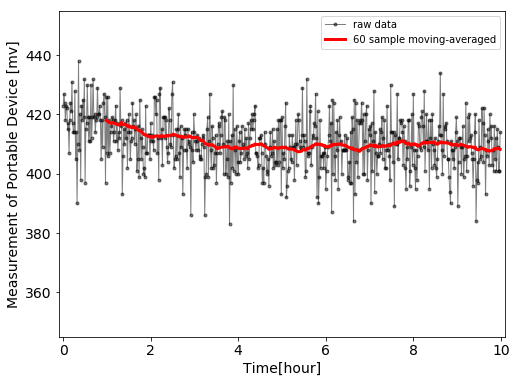

In [93]:
time_min = np.arange(0,dataSharp['PM2_5'].shape[0],1)
pm25 = dataSharp['PM2_5']
windowM = 60
pm25_moving_averaged = pd.rolling_mean(pm25,window=windowM)
plt.figure(figsize=(8,6))
hourD =  10 
plt.plot(time_min[:hourD*60]/60,pm25[:hourD*60],'-k.',markersize=6,lw=1,alpha=0.5,label='raw data')
plt.plot(time_min[:hourD*60]/60,pm25_moving_averaged[:hourD*60],'r',markersize=6,lw=3, \
           alpha=1,label='%d'%windowM + ' sample moving-averaged')
plt.xlabel('Time[hour]',fontsize=14)
plt.ylabel('Measurement of Portable Device [mv]',fontsize=14)
plt.tick_params(labelsize = 14)
plt.xlim([0-0.1,hourD+0.1]);plt.ylim([350-5,450+5])
plt.legend()

savefigure = True
if savefigure==True:
    plt.savefig('./fig_Regression/Device_raw_voltage.png', dpi=600,bbox_inches='tight')
    
plt.show()


## Sharp Data Test
csv file name = excel file name - sheet name

In [8]:
data_sharp = pd.read_csv('./csv/CC3200 Sharp Sensor PM2_5 Test-Rm229-5-16-2017.csv')
#data_sharp = pd.read_csv('./csv/CC3200 Sharp Sensor PM2_5 Test.csv')
#data_sharp = pd.read_excel('./xls/CC3200 Sharp Sensor PM2_5 Test.xlsx', sheetname='Rm229-5-16-2017')

In [9]:
data_sharp.head()

,id,time,temperature,humidity,PM2_5,MovingAverage,BatteryStatus
0,0,05/16/2017 17:58:03,249,423,423,197,0
1,1,05/16/2017 17:59:05,246,425,427,1699,0
2,2,05/16/2017 18:00:03,245,430,424,419,0
3,3,05/16/2017 18:01:05,243,435,418,416,0
4,4,05/16/2017 18:02:04,243,439,423,418,0


In [10]:
# read Sharp PM2.5 measuring device data
date_time = pd.to_datetime(data_sharp['time'])
temperature = data_sharp['temperature']/10 # degrees
humidity = data_sharp['humidity']/10 # %
PM2_5 = data_sharp['PM2_5'] # mili-volts

dataSharp = pd.concat([date_time.dt.date, date_time.dt.hour,date_time.dt.minute,temperature,humidity,PM2_5], axis=1)
dataSharp.columns = ['dateTime','hour','minute','temperature','humidity','PM2_5']
#print(dataSharp.head())

# average PM2.5 sensor measurement for an hour
PM2_5_hourly_mean = dataSharp.groupby(['dateTime','hour']).mean()
PM2_5_hourly_mean_copy = PM2_5_hourly_mean.copy()

# reset index for time format addition
PM2_5_ResetIndex = PM2_5_hourly_mean_copy.reset_index()


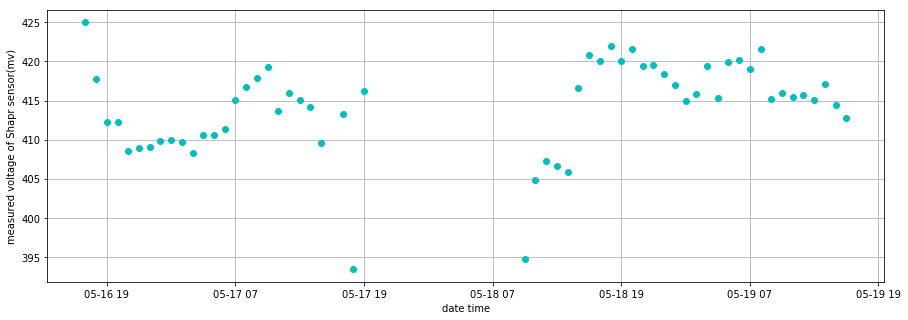

In [11]:
# time format correction
timeString = PM2_5_ResetIndex['hour'].apply(lambda x  : '0{}:00:00'.format(x) if x<10 else  '{}:00:00'.format(x))
DateTimeString = PM2_5_ResetIndex['dateTime'].astype(str) + ' ' + timeString
newDateTime = pd.to_datetime(DateTimeString)
PM2_5_ResetIndex['newDateTime'] = newDateTime
plt.figure(figsize=(15,5))
plt.plot(PM2_5_ResetIndex['newDateTime'], PM2_5_ResetIndex['PM2_5'],'co')
plt.xlabel('date time')
plt.ylabel('measured voltage of Shapr sensor(mv)')
plt.grid()

### Let's turn the above procedures into a function for csv data processing into Pandas dataframe

In [12]:
# A function that takes csv file and turn it into Pandas data frame.
# returns dataframe with a plot
def csvProcessing(filePath):
    # filePath is file path string 
    # data_sharp = pd.read_csv('./csv/CC3200 Sharp Sensor PM2_5 Test.csv')
    data_sharp = pd.read_csv(filePath)
    # read Sharp PM2.5 measuring device data
    date_time = pd.to_datetime(data_sharp['time'])
    temperature = data_sharp['temperature']/10 # degrees
    humidity = data_sharp['humidity']/10 # %
    PM2_5 = data_sharp['PM2_5'] # mili-volts
    dataSharp = pd.concat([date_time.dt.date, date_time.dt.hour,date_time.dt.minute,temperature,humidity,PM2_5], axis=1)
    dataSharp.columns = ['date','hour','minute','temperature','humidity','PM25']
    # average PM2.5 sensor measurement for an hour
    PM2_5_hourly_mean = dataSharp.groupby(['date','hour']).mean()
    PM2_5_hourly_mean_copy = PM2_5_hourly_mean.copy()
    # reset index for time format addition
    PM2_5_ResetIndex = PM2_5_hourly_mean_copy.reset_index()
    # time format correction
    timeString = PM2_5_ResetIndex['hour'].apply(lambda x  : '0{}'.format(x) if x<10 else  '{}'.format(x))
    DateTimeString = PM2_5_ResetIndex['date'].astype(str) + ' ' + timeString
    newDateTime = pd.to_datetime(DateTimeString)
    PM2_5_ResetIndex['dateTime'] = newDateTime
    plt.figure(figsize=(15,5))
    plt.plot(PM2_5_ResetIndex['dateTime'], PM2_5_ResetIndex['PM25'],'co')
    plt.xlabel('date')
    plt.ylabel('measured voltage of Shapr sensor(mv)')
    plt.grid()
    return PM2_5_ResetIndex

Convert sharp data csv into pandas dataframe

,dateTime,temperature,humidity,PM25
0,2017-05-22 10:00:00,24.933333,51.266667,421.333333
1,2017-05-22 11:00:00,25.523333,49.233333,413.033333


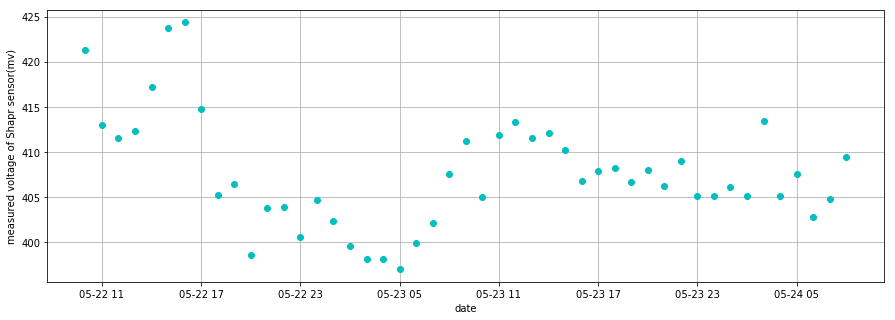

In [13]:
file_path = './csv/CC3200 Sharp Sensor PM2_5 Test-Rm229-5-22-2017.csv'
df1=csvProcessing(file_path)
# select only dateTime, temperature, humidity, and PM25
df1 = df1.ix[:,['dateTime','temperature','humidity','PM25']]
df1.head(2)

,dateTime,temperature,humidity,PM25
0,2017-05-16 17:00:00,24.750000,42.400000,425.000000
1,2017-05-16 18:00:00,24.043333,46.708333,417.716667


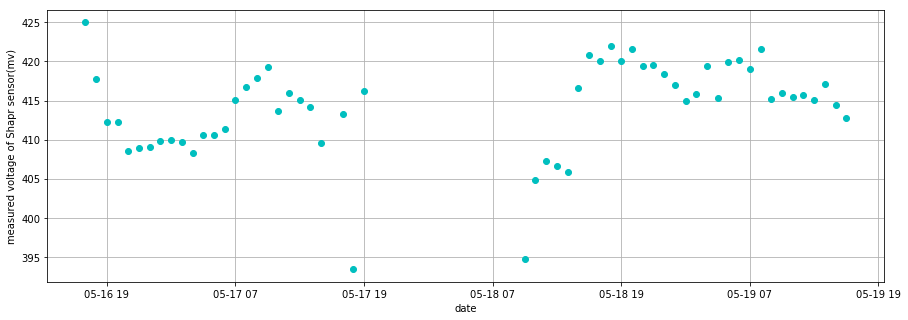

In [14]:
file_path = './csv/CC3200 Sharp Sensor PM2_5 Test-Rm229-5-16-2017.csv'
df2=csvProcessing(file_path)
# select only dateTime, temperature, humidity, and PM25
df2 = df2.ix[:,['dateTime','temperature','humidity','PM25']]
df2.head(2)

#### Combine multiple dataframes into one dataframe
Combine two separate Sharp measurments into one DataFrame

In [15]:
dataframe1 = df1
dataframe2 = df2
dataframe_total = pd.concat([dataframe1,dataframe2])
dataframe_total.sort_values(by='dateTime', inplace=True) # sort by date time
dataframe_total.head(2)

,dateTime,temperature,humidity,PM25
0,2017-05-16 17:00:00,24.750000,42.400000,425.000000
1,2017-05-16 18:00:00,24.043333,46.708333,417.716667


Plot

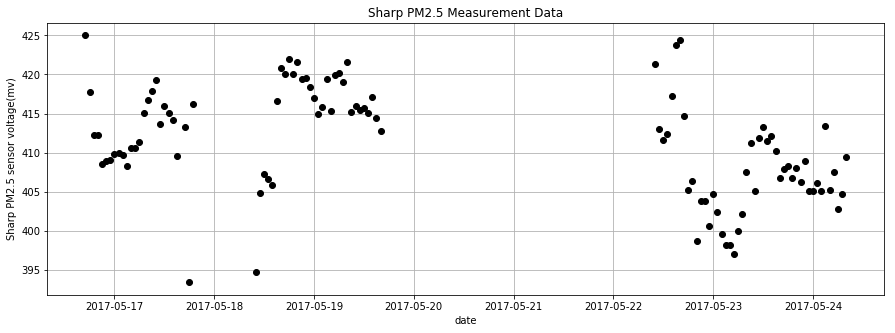

In [16]:
plt.figure(figsize=(15,5))
x_axis_data = dataframe_total['dateTime']
y_axis_data = dataframe_total['PM25']
plt.plot(x_axis_data,y_axis_data,'ko')
plt.xlabel('date'),plt.ylabel('Sharp PM2.5 sensor voltage(mv)'),plt.grid()
plt.title('Sharp PM2.5 Measurement Data');

### Read Unjung-dong Government station data
Data file is in csv format and stored in ./csv folder.

In [17]:
filePath = './csv/data_Unjung_2017_5.csv'
data_Unjung = pd.read_csv(filePath)

In [18]:
[data_Unjung.head(2), data_Unjung.shape]

[        dateTime  PM25_1HR  PM25_24HR
 0  2017-05-25:11      16.0       15.0
 1  2017-05-25:10      21.0       15.0, (227, 3)]

In [19]:
# read data time string 
date_time = data_Unjung['dateTime']

# read PM2.5 1HR measurement
PM2_5_1HR = data_Unjung['PM25_1HR']

# read PM2.5 24HR measurement
# PM2_5_24HR = data_Unjung['PM25_24HR']

Convert data time string into Pandas date-time format
ex: 2017-05-23 23:00:00

In [20]:
date_time = convertDateTimeFormat(date_time)

Any column can be made as an index of DataFrame by using pd.pivot_table method.
This is just for reference using Pandas pivot_table method. 
It is not necessary for current PM2.5 data analysis. 
To change dataframe index use pivot_table method and uncomment below.

In [21]:
#pd.pivot_table(data_Unjung,index=['dateTime']).head(2)

Concate pandas series data columnwise. Note axis=1 option setting in pd.concat method.

In [22]:
series1 = date_time
series2 = PM2_5_1HR
data_Unjung = pd.concat([series1,series2],axis=1)
pandas_dataframe_column_string = ['dateTime','PM25_1HR']
data_Unjung.columns= pandas_dataframe_column_string
data_Unjung.head(2)

,dateTime,PM25_1HR
0,2017-05-25 11:00:00,16.0
1,2017-05-25 10:00:00,21.0


### Plot Unjung-dong measurements data

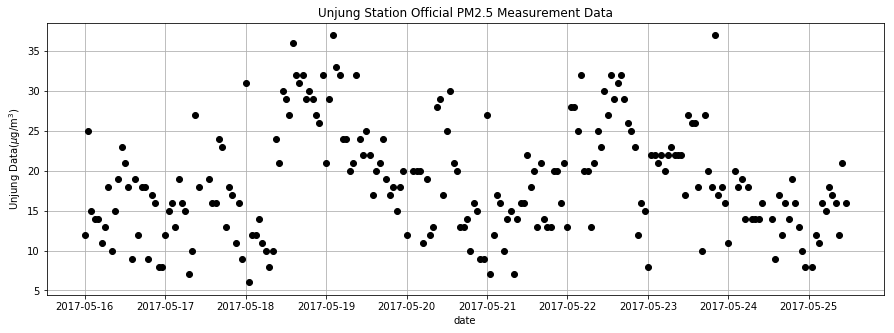

In [23]:
plt.figure(figsize=(15,5))
x_axis_data = data_Unjung['dateTime']
y_axis_data = data_Unjung['PM25_1HR']
plt.plot(x_axis_data,y_axis_data,'ko')
plt.title('Unjung Station Official PM2.5 Measurement Data')
plt.xlabel('date');plt.ylabel('Unjung Data($\mu$g/m$^3$)');plt.grid();

### Merge Sharp PM2.5 sensor data and Unjung station data
Merge data_frame1 with data_frame2 with 'dateTime' as a referece for merging. Then create a new combined csv file for regression analysis.

In [24]:
dataframe1 = dataframe_total # Sharp measurements
dataframe2 = data_Unjung # Unjung official data micro-gram/m^3
dataframe_total = pd.merge(dataframe1,dataframe2,on='dateTime', how='left')
dataframe_total.dropna();

#### Preprocess Pandas DataFrame and Write DataFrame into csv file.
 - remove unavailable data from measurement station data
 - change column name into meta data format(temperature,humidity,Sharp measured voltage[mv] ,measurement of certified station)
 - subtract Sharp measurement mean-voltage from original measurement data

In [25]:
# remove unavailable data
dataframe_total.dropna(inplace=True)

# change column name into meta data format
dataframe_total.columns = ['dateTime', 'temperature','humidity', \
                           'Sharp measured voltage[mv]','measurement of certified station']

# subtract DC offset
DC_Offset = 380
dataframe_total['Sharp measured voltage[mv]'] -=  DC_Offset

# write csv file
file_name_for_csv = 'SharpUnjung.csv'
dataframe_total.to_csv(file_name_for_csv, sep=',')

In [26]:
dataframe_total.head(5)

,dateTime,temperature,humidity,Sharp measured voltage[mv],measurement of certified station
0,2017-05-16 17:00:00,24.750000,42.400000,45.000000,18.0
1,2017-05-16 18:00:00,24.043333,46.708333,37.716667,18.0
2,2017-05-16 19:00:00,23.630000,46.618333,32.300000,9.0
3,2017-05-16 20:00:00,23.101667,46.231667,32.266667,17.0
4,2017-05-16 21:00:00,22.761667,43.905000,28.516667,16.0


### Plot with different y-axis scales

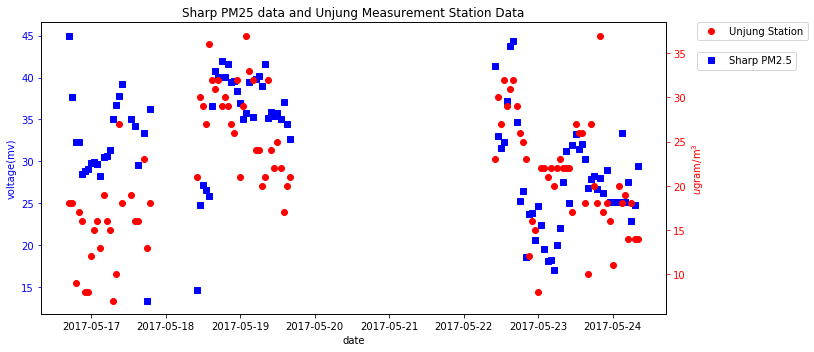

In [27]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dataframe_total['dateTime'],dataframe_total['Sharp measured voltage[mv]'], 'bs',label='Sharp PM2.5')
ax1.set_xlabel('date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('voltage(mv)', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
ax2 = ax1.twinx()
ax2.plot(dataframe_total['dateTime'],dataframe_total['measurement of certified station'], 'ro',label='Unjung Station')
ax2.set_ylabel('$u$gram/m$^3$', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Sharp PM25 data and Unjung Measurement Station Data')
fig.tight_layout()
plt.show()

#### Regression

R^2: 0.113762804464


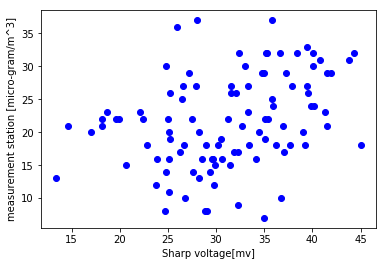

In [28]:
from sklearn.linear_model import LinearRegression

xx=dataframe_total['Sharp measured voltage[mv]']
yy=dataframe_total['measurement of certified station']
plt.plot(xx,yy,'bo')
plt.xlabel('Sharp voltage[mv]')
plt.ylabel('measurement station [micro-gram/m^3]')

#reshape single feature
xx = xx.values.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(xx,yy)
R2t = regression_model.score(xx,yy)
print('R^2:',R2t)